<a href="https://colab.research.google.com/github/mgarbanzo/tallerCienciasGOES16/blob/master/TALLER_GOES_16_para_Estudiantes_de_Ciencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I Semana de las Ciencias - SATÉLITES METEOROLÓGICOS
# Marcial Garbanzo Salas, M.Sc., PhD.
## Escuela de Física
## Laboratorio de Observación del Sistema Climático

En este notebook vamos a trabajar la obtención de datos del satélite GOES 16 y la generación de productos.

Se está utilizando Colab.Research para poder realizar las tareas de manera que este taller consuma el menor ancho de banda posible para los participantes, y que tampoco requiera tiempo de cálculo en sus computadoras personales y se obtiene de la siguiente manera:

1. Los datos se mueven de la nube computacional de amazon (AWS) a la nube de Google.
2. Los datos se leen y procesan en el entorno Colab.Research por tanto no consumen memoria en las computadoras personales ni requieren uso del procesador del usuario.

Comenzamos instalando en este entorno virtual la librería requerida para leer datos en formato NetCDF.

In [1]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 2.9MB/s 
     |████████████████████████████████| 296kB 31.7MB/s 


In [38]:
#%matplotlib inline
import numpy as np
import pylab as plt
from netCDF4 import Dataset
import pandas as pd

In [3]:
!uname -a

Linux dd556c400a74 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux


# Descarga de datos

Los datos del GOES 16 se encuentran en la nube de Amazon (AWS). Se pueden descargar desde cualquier sistema operativo con los programas adecuados. En la computadora que ejecuta este entorno (Linux) podemos utilizar comandos como *wget* para la descarga.

[Este sitio](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2020-09-15&hour=18) nos permite obtener enlaces simples para la descarga de datos que podemos utilizar para obtener la información de los diferentes sensores del satélite.

En la siguiente casilla descargamos datos para el día 14 de Setiembre del 2020. ¿Que estaban haciendo ese día feriado?

Los datos que se descargan son Canal 1, 2, 3, 5, 10 y 13. Las longitudes de onda respectivas son: 0.47, 0.64, 0.86, 1.6, 7.3 y 10.3. Los humanos solo podemos ver las dos primeras.

In [4]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc

!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C05_G16_s20202581800184_e20202581809492_c20202581810001.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C10_G16_s20202581800184_e20202581809503_c20202581809587.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C13_G16_s20202581800184_e20202581809503_c20202581809592.nc

--2020-09-25 06:27:32--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.101.235
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.101.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98362821 (94M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  93.81M  44.2MB/s    in 2.1s    

2020-09-25 06:27:34 (44.2 MB/s) - ‘OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc’ saved [98362821/98362821]

--2020-09-25 06:27:35--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/258/18/OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)...

# Lectura de Metadatos y Datos

Antes de leer los datos de un archivo NetCDF del GOES 16 es bueno conocer un poco de la estructura de Metadatos. Luego se pueden leer las variables apropiadas que contienen la información de interés.

In [6]:
ncABIC01 = Dataset("/content/OR_ABI-L2-CMIPF-M6C01_G16_s20202581800184_e20202581809492_c20202581810002.nc")
ncABIC02 = Dataset("/content/OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc")
ncABIC03 = Dataset("/content/OR_ABI-L2-CMIPF-M6C03_G16_s20202581800184_e20202581809492_c20202581809594.nc")
ncABIC05 = Dataset("/content/OR_ABI-L2-CMIPF-M6C05_G16_s20202581800184_e20202581809492_c20202581810001.nc")
ncABIC10 = Dataset("/content/OR_ABI-L2-CMIPF-M6C10_G16_s20202581800184_e20202581809503_c20202581809587.nc")
ncABIC13 = Dataset("/content/OR_ABI-L2-CMIPF-M6C13_G16_s20202581800184_e20202581809503_c20202581809592.nc")

In [8]:
ncABIC02 #Este es el archivo de mayor resolución, tiene 500 metros de resolución en el ecuador y es 28 veces una imagen de 4K

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 0.5km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CMIPF-M6C02_G16_s20202581800184_e20202581809492_c20202581809590.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single reflective band Cloud and Moisture Imagery Produc

En esta sección los participantes del taller son bienvenidos a graficar los diferentes canales.

Los canales 1 y 2 son muy intuitivos porque los ojos de los humanos pueden recibir estas longitudes de onda. **Los otros canales algunos son facilmente interpretables, otros no.** Grafíque los datos y trate de comprender la información. ¿Nota alguna diferencia? ¿Cual canal le llama más la atención? 

Por ejemplo, podemos graficar los datos del Canal 1 utilizando su información:

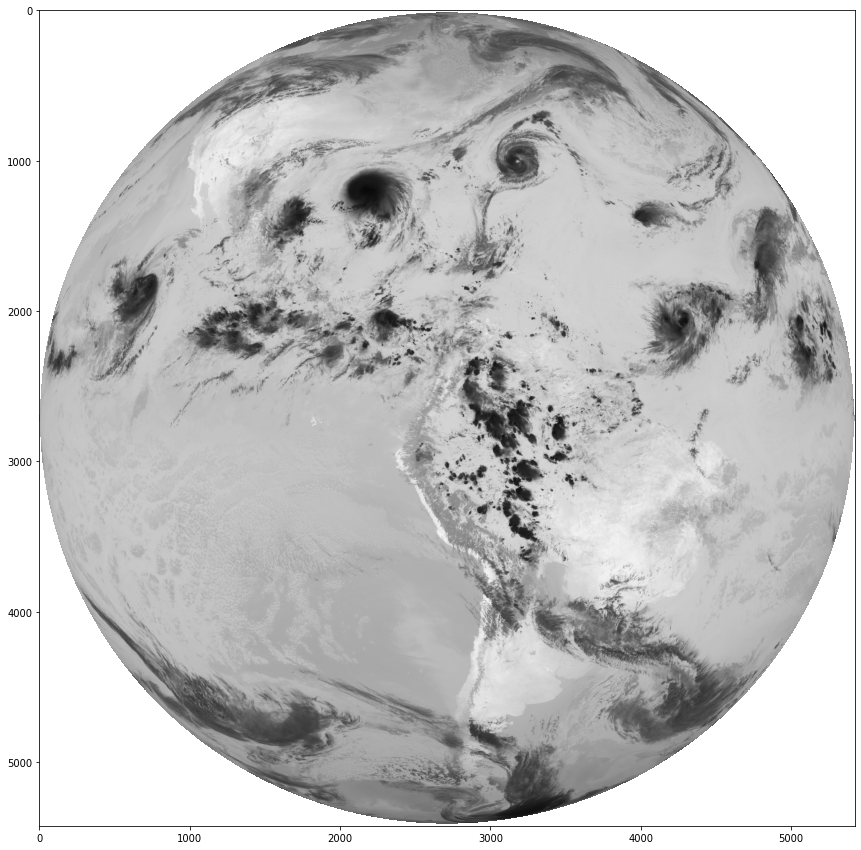

In [12]:
datos = ncABIC13.variables['CMI']
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='gray')

# Obtengamos datos de otro sensor. El GOES 16 también tiene un sensor para rayería.

En el [sitio mencionado anteriormente](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2020-09-15&hour=18) puede seleccionar el producto **GLM L2 Lightning Detection** para el mismo día y hora.

¡Note la cantidad de información! Ese sensor genera un producto cada 20 segundos, generados por revisiones del brillo del planeta que se hacen 500 veces por segundo.

In [13]:
!wget https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/258/18/OR_GLM-L2-LCFA_G16_s20202581800000_e20202581800200_c20202581800227.nc

--2020-09-25 06:40:25--  https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/258/18/OR_GLM-L2-LCFA_G16_s20202581800000_e20202581800200_c20202581800227.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.147.51
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.147.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499755 (488K) [binary/octet-stream]
Saving to: ‘OR_GLM-L2-LCFA_G16_s20202581800000_e20202581800200_c20202581800227.nc’

OR_GLM-L2-LCFA_G16_ 100%[===================>] 488.04K  --.-KB/s    in 0.05s   

2020-09-25 06:40:25 (9.37 MB/s) - ‘OR_GLM-L2-LCFA_G16_s20202581800000_e20202581800200_c20202581800227.nc’ saved [499755/499755]



In [25]:
ncGLM = Dataset("/content/OR_GLM-L2-LCFA_G16_s20202581800000_e20202581800200_c20202581800227.nc")

Para identificar las diferentes variables así como sus unidades debe observar los metadatos.

Para ver los metadatos del archivo puede ejecutar simplemente **ncGLM**, pero si quiere observar la información de TODAS las variables que contiene el archivo puede ejecutar **ncGLM.variables**.

¿Cuales son las unidades de *flash_area*? ¿Puede encontrarla entre tanta información?

La rayería se mide en función de la cantidad de eventos, grupos y flashes que se indentifican en 20 segundos. Veamos cuantos de cada uno de esos se encontraron en esta medición:

In [27]:
print(ncGLM.variables['event_count'][:],ncGLM.variables['group_count'][:],ncGLM.variables['flash_count'][:])

13050 5570 594


Leamos algunas variables básicas del GLM y generemos un gráfico.

In [28]:
e_lats = ncGLM.variables['event_lat'][:]
e_lons = ncGLM.variables['event_lon'][:]

g_lats = ncGLM.variables['group_lat'][:]
g_lons = ncGLM.variables['group_lon'][:]

f_lats = ncGLM.variables['flash_lat'][:]
f_lons = ncGLM.variables['flash_lon'][:]
f_area = ncGLM.variables['flash_area'][:]
f_ener = ncGLM.variables['flash_energy'][:]

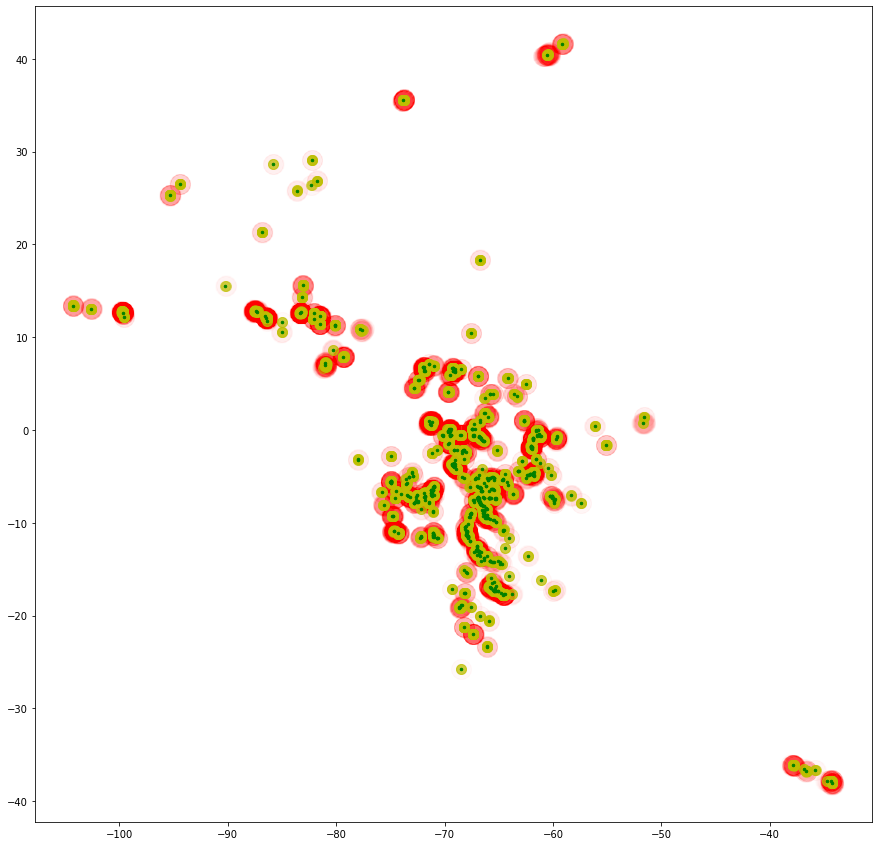

In [37]:
fig, ax = plt.subplots(1,figsize=(15,15))
ax.plot(e_lons,e_lats,'.r', markersize=40, alpha=0.01)
ax.plot(g_lons,g_lats,'.y', markersize=20, alpha=0.5)
ax.plot(f_lons,f_lats,'.g', markersize=5, alpha=1)

# Generación de gráfico dinámico para observar FLASHES

Se puede utilizar motores de graficación mejores para observar con mejor detalle la información.

La bibliteca Altair permite utilizar múltiples variables definidas en diccionarios de Python para visualizar mejor la información.

A continuación se crea el diccionario y luego se grafican los datos. 

**¿Puede encontrar donde ocurrió el flash más grande?**

**¿Puede encontrar donde ocurrió el flash con más energía?**


In [42]:
dict = {'Lats': f_lats, 'Lons': f_lons, 'Area': f_area, 'Energia': f_ener}
df = pd.DataFrame(dict) 

In [43]:
df

,Lats,Lons,Area,Energia
0,-9.472326,-65.996986,4.018007e+08,3.012839e-13
1,-15.356665,-67.940399,6.882344e+07,9.285114e-15
2,1.017959,-62.692574,3.335877e+08,1.728508e-14
3,-7.339006,-66.890236,1.323058e+08,2.428505e-14
4,-20.078009,-66.745628,7.202808e+07,9.285114e-15
...,...,...,...,...
589,-0.051520,-69.526909,3.882191e+08,1.752844e-13
590,-13.171351,-66.763641,2.043339e+08,1.228510e-14
591,7.029706,-80.998192,2.881581e+09,4.632833e-13
592,3.893509,-65.509155,1.318480e+08,5.128494e-14


In [44]:
from vega_datasets import data

import altair as alt
alt.Chart(df).mark_point().encode(
  x='Lons',
  y='Lats',
  color='Energia',
  size='Area',
  tooltip=['Lats', 'Lons', 'Area', 'Energia']
).interactive()

alt.Chart(...)

# A continuación se presenta más información extraída del GLM

Si algún participante desea explorar más de los datos se recomienda leer los metadatos de las variables utilizadas e interpretar la información.

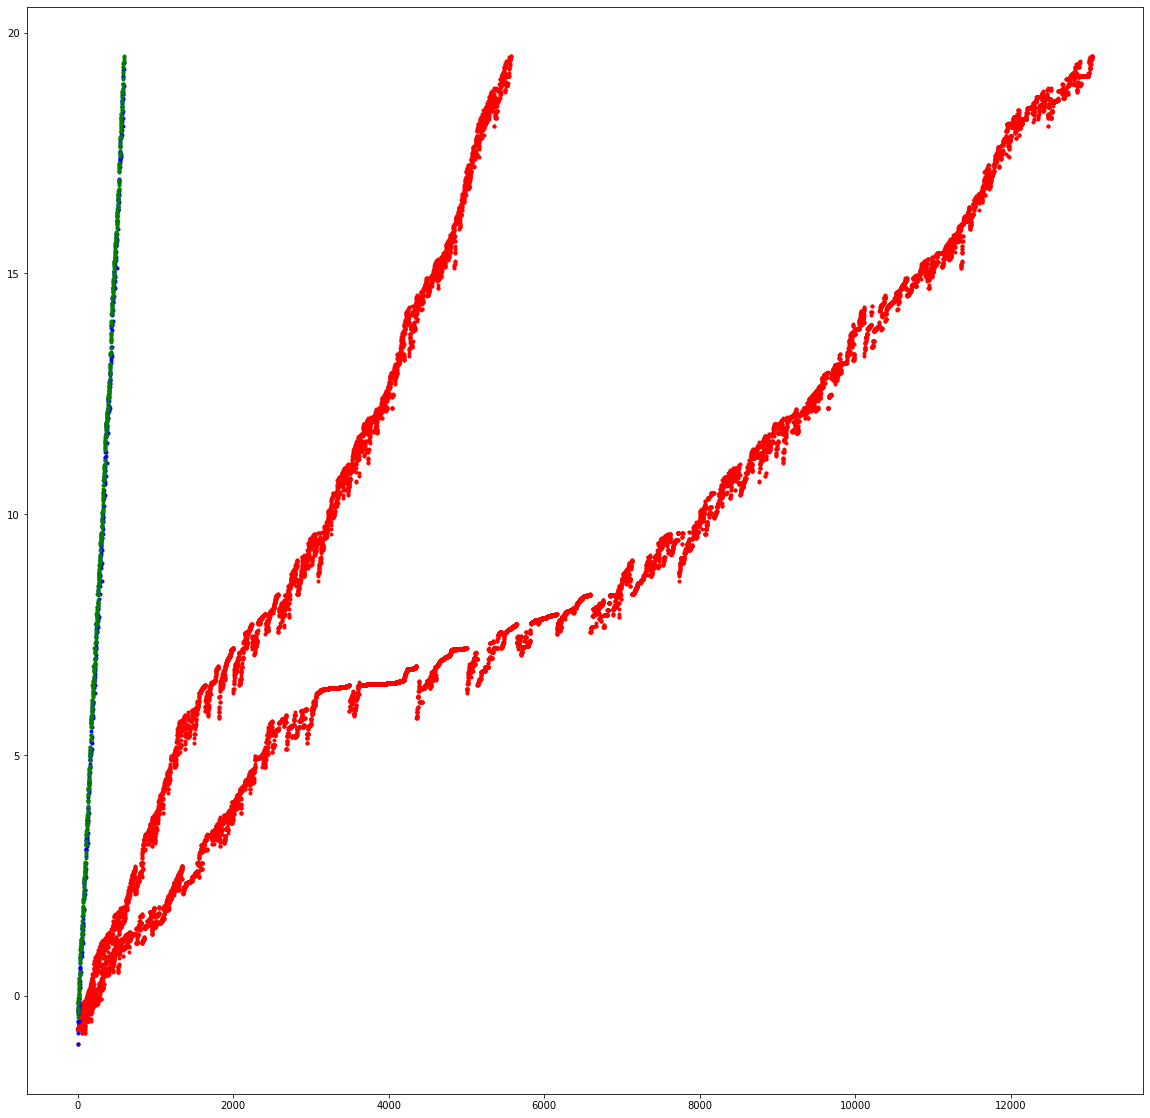

In [46]:
e_offsets = ncGLM.variables['event_time_offset'][:]
g_offsets = ncGLM.variables['group_time_offset'][:]
ff_offsets = ncGLM.variables['flash_time_offset_of_first_event'][:]
fl_offsets = ncGLM.variables['flash_time_offset_of_last_event'][:]

fig, ax = plt.subplots(1,figsize=(20,20))
ax.plot(e_offsets,'.r')
ax.plot(g_offsets,'.r')
ax.plot(ff_offsets,'.b')
ax.plot(fl_offsets,'.g')

In [ ]:
# NEO ESCRIBIENDO EN LOS NOTEBOOKS
# tbguhj